In [1]:
# importações
from modelos.alg_genetico_bit import Alg_gen_bit
from modelos.alg_genetico_dec import Alg_gen_dec
import matplotlib.pyplot as plt
from modelos.rodadas import Rodadas

## Função de Rastigin
$$
f(x) = A \cdot p + \sum_{i=1}^p(x_i^2 - A  \cdot \cos(2\cdot \pi \cdot x_i))
$$


## Objetivo

Minimizar a função exposta utilizando os algoritmos genéticos desenvolvidos (`Alg_gen_bit`, `Alg_gen_dec`).

- **Alg_gen_bit**: 
  - Criado implementando a representação canônica dos cromossomos.

- **Alg_gen_dec**: 
  - Implementado com a representação cromossômica em ponto flutuante.


In [2]:
# uso do algoritmo Alg_gen_bit
alg_1 = Alg_gen_bit(
    bit = 15,
    pop_size= 100,
    max_generation= 1000,
    # as retrições são oferecidas pelo problema,
    # nesse caso é [-10, 10] para cada cromossomo 
    restricoes=[-10, 10],
    # também estabelecido pelo problema
    crossover_rate=0.85,
    mutation_rate=0.01,
    # constante da função
    A = 10,
    # número de dimenções
    p = 20,
    # para o crossover, número de pontos que o cromossomo é dividido
    # quando aplicado o crossover 
    n_cross= 2
)

In [3]:
melhor, populacao, _ = alg_1.executar()
print(f"Melhor aptidão: {alg_1.f_apt(alg_1.convert(melhor))}")
print("Melhor inidivíduo (bits)")
print(melhor)
print("Melhor indivíduo (convertido)")
print(alg_1.convert(melhor))

Melhor aptidão: 98.25487726677473
Melhor inidivíduo (bits)
[0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1
 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1
 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1
 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0
 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 1]
Melhor indivíduo (convertido)
[-1.06418043 -0.03265481  2.15552232 -1.22531816  0.97323527  2.05847346
 -1.05624561  1.05868709  2.03588977 -0.9152501  -1.96752831  1.2857448
 -0.86519974 -0.51911985  0.00518815  1.0831019  -0.84200568  0.14862514
  0.84933012  0.07049776]


In [10]:
# Uso do algoritmo Alg_gen_dec
alg_2 = Alg_gen_dec(
    # indice de distribuição
    eta = 1,
    # tamanho da população (numero de indivíduos por populaçao)
    pop_size= 100,
    # número máximo de gerações
    max_generation= 1000,
    # restrições do problema
    restricoes=[-10, 10],
    # chance de acontecer crossover
    crossover_rate= 0.85,
    # chance de ocorrer mutação
    mutation_rate= 0.01,
    # constante da função
    A = 10,
    # número de dimenções
    p = 20,
    # escala de intencidade da mutação
    sigma=0.1,
    # número de indivíduos selecionados para torneio
    tournament_size = 10
)

In [11]:
melhor, populacao, _ = alg_2.executar()
print(f"Melhor aptidão: {alg_2.f_apt(melhor)}")
print("Melhor indivíduo:")
print(melhor)

Melhor aptidão: 211.92818226335032
Melhor indivíduo:
[ 9.94950828e-01  9.94958639e-01  5.96957278e+00 -5.70743514e-06
 -5.96957208e+00  1.98991223e+00  2.98485571e+00  3.97978385e+00
 -9.94957103e-01  7.95920839e+00  9.94958847e-01  3.64330937e-09
  9.95014824e-01  1.98981172e+00  1.77296690e-09 -9.94913595e-01
  3.97978386e+00 -1.98991223e+00  9.94958640e-01  3.97978392e+00]


## 100 Rodada

In [8]:
# aqui será aplicado 100 rodadas de cada algoritmo, para comparar o comportamento de ambos entre si
# preparar rodadas

rodadas = Rodadas(100)

rodadas.init_alg_1(
    bit = 15,
    pop_size= 100,
    max_generation= 1000,
    # as retrições são oferecidas pelo problema,
    # nesse caso é [-10, 10] para cada cromossomo 
    restricoes=[-10, 10],
    # também estabelecido pelo problema
    crossover_rate=0.85,
    mutation_rate=0.01,
    # constante da função
    A = 10,
    # número de dimenções
    p = 20,
    # para o crossover, número de pontos que o cromossomo é dividido
    # quando aplicado o crossover 
    n_cross= 2
)

rodadas.init_alg_2(
        # indice de distribuição
    eta = 1,
    # tamanho da população (numero de indivíduos por populaçao)
    pop_size= 100,
    # número máximo de gerações
    max_generation= 1000,
    # restrições do problema
    restricoes=[-10, 10],
    # chance de acontecer crossover
    crossover_rate= 0.85,
    # chance de ocorrer mutação
    mutation_rate= 0.01,
    # constante da função
    A = 10,
    # número de dimenções
    p = 20,
    # escala de intencidade da mutação
    sigma=0.1,
    # número de indivíduos selecionados para torneio
    tournament_size = 3
)

In [9]:
# começar as rodadas
rodadas.run()

     Algoritmo  Menor Aptidão  Maior Aptidão  Média Aptidão  \
0  Algoritmo 1      82.587368     852.036431     643.459719   
1  Algoritmo 2      83.494942     329.814253     182.992002   

   Desvio-Padrão Aptidão  
0              74.314990  
1              54.480249  
\begin{tabular}{lrrrr}
\toprule
Algoritmo & Menor Aptidão & Maior Aptidão & Média Aptidão & Desvio-Padrão Aptidão \\
\midrule
Algoritmo 1 & 82.587368 & 852.036431 & 643.459719 & 74.314990 \\
Algoritmo 2 & 83.494942 & 329.814253 & 182.992002 & 54.480249 \\
\bottomrule
\end{tabular}



## Média da população por geração

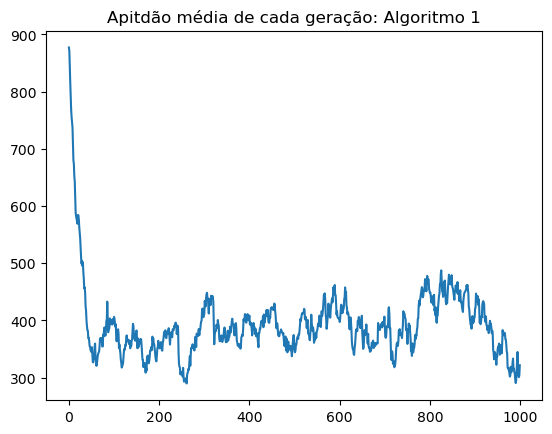

In [10]:
# media da população 
# uso do algoritmo Alg_gen_bit
alg_1 = Alg_gen_bit(bit = 15, pop_size= 100, restricoes=[-10, 10], max_generation= 1000)
_, _, mean_per_gen =  alg_1.executar()
plt.title("Apitdão média de cada geração: Algoritmo 1")
plt.plot(mean_per_gen)

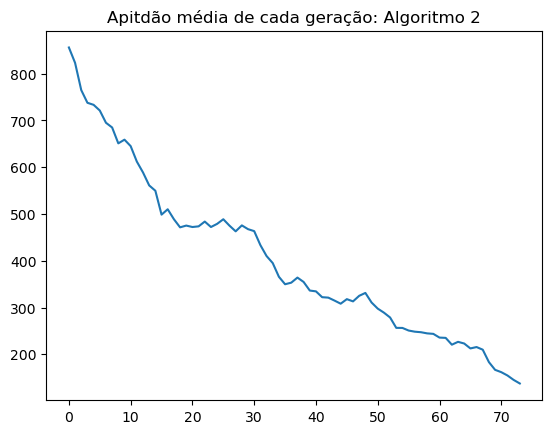

In [11]:
# media da população 
# uso do algoritmo Alg_gen_bit
alg_2 = Alg_gen_dec(eta = 1, pop_size= 100, max_generation= 1000,restricoes=[-10, 10])
_, _, mean_per_gen =  alg_2.executar()
plt.title("Apitdão média de cada geração: Algoritmo 2")
plt.plot(mean_per_gen)